In [1]:
#!pip3 install matplotlib

In [2]:
import json
import matplotlib.pyplot as plt

#setting the dynamic path so we can access any data on demand
src_path = '../DataSet/'

In [3]:
#assigning the specific file path
file_name = 'cs196a1-2024-01-29-20-32.submit'
src_path += file_name

with open(src_path, 'r') as assignmentFile:
    json_data = json.load(assignmentFile)

    # Extract the "log" field from the parsed JSON
    log_field = json_data['submission']['logs'][0]['log']
   

In [4]:
# Split the log_field into individual JSON objects
logs = log_field.strip().split('\n')

# Define dictionaries to hold information for each timestamp
knowledge_base = {}

# Iterate over each log entry
for log in logs:
    data = json.loads(log)
    timestamp = data.get('t')
    cell_number = data.get('u')
    new_value = data.get('v')
    insert_data = data.get('^')
    cursor_position = data.get('|')
    cursor_position_in_file = data.get('_c')
    total_chars_in_file = data.get('_cs')
    current_line_number = data.get('_l')
    total_lines_in_file = data.get('_ls')

    knowledge_base[timestamp] = {
        'cell_number': cell_number,
        'new_value': new_value,
        'insert_data': insert_data,
        'cursor_position': cursor_position,
        'cursor_position_in_file': cursor_position_in_file,
        'total_chars_in_file': total_chars_in_file,
        'current_line_number': current_line_number,
        'total_lines_in_file': total_lines_in_file
    }

In [5]:
#extracting the x as timestamp and y as total chars in file

x = []
y = []

temp = 0

for timestamp, comment_data in knowledge_base.items():
    x.append(timestamp)
    if comment_data["total_chars_in_file"] is None:
        y.append(temp)
    else:
        temp = comment_data["total_chars_in_file"]
        y.append(comment_data["total_chars_in_file"])

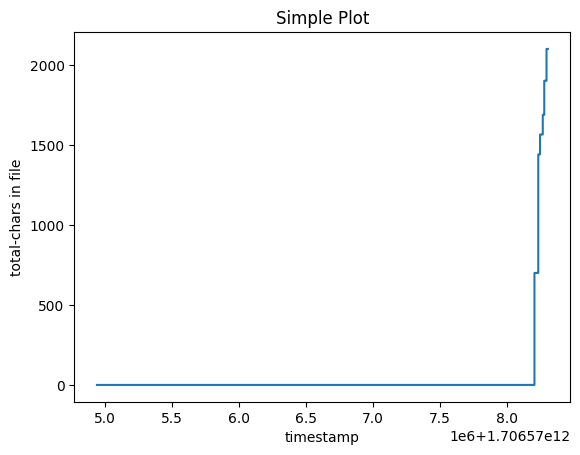

In [6]:
# plotting the data 
plt.plot(x, y) 
  
# Adding the title 
plt.title("Simple Plot") 
  
# Adding the labels 
plt.ylabel("total-chars in file") 
plt.xlabel("timestamp") 
plt.show()

In [7]:
# Print the knowledge_base
for timestamp, comment_data in knowledge_base.items():
    print(f'Timestamp: {timestamp}')
    print(f'Cell Number: {comment_data["cell_number"]}')
    print(f'New Value: {comment_data["new_value"]}')
    print(f'Insert Data: {comment_data["insert_data"]}')
    print(f'Cursor Position: {comment_data["cursor_position"]}')
    print(f'Cursor Position in File: {comment_data["cursor_position_in_file"]}')
    print(f'Total Chars in File: {comment_data["total_chars_in_file"]}')
    print(f'Current Line Number: {comment_data["current_line_number"]}')
    print(f'Total Lines in File: {comment_data["total_lines_in_file"]}')
    print('---------------------------')

Timestamp: 1706574939669
Cell Number: 0
New Value: 
Insert Data: None
Cursor Position: None
Cursor Position in File: None
Total Chars in File: None
Current Line Number: None
Total Lines in File: None
---------------------------
Timestamp: 1706578168467
Cell Number: 0
New Value: None
Insert Data: None
Cursor Position: 0
Cursor Position in File: 0
Total Chars in File: 0
Current Line Number: 0
Total Lines in File: 1
---------------------------
Timestamp: 1706578184623
Cell Number: 0
New Value: None
Insert Data: None
Cursor Position: 0
Cursor Position in File: 0
Total Chars in File: 0
Current Line Number: 0
Total Lines in File: 1
---------------------------
Timestamp: 1706578206506
Cell Number: 0
New Value: None
Insert Data: [0, 0, "class Dog:\r\n    '''A class represeting a dog. It includes attributes such as, the name of the dog, its age, and its breed.'''\r\n    def __init__(self, name, age, breed ):\r\n        '''Initializes a Dog object with name, age, and breed attributes.'''\r\n    